## Importing python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\Aishwarya\anaconda3\ANAKONDA PYTHON\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('stroke_data.csv')

In [3]:
df

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0


In [4]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 40910 rows and 11 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [6]:
df.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [7]:
df.isna().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df['sex']=df['sex'].astype(int)
df['age']=df['age'].astype(int)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_30616\2133514247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=df['sex'].astype(int)
C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_30616\2133514247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].astype(int)


In [10]:
df=df[df['age']>=1]

In [11]:
df.duplicated().sum() 

0

## Sex column

In [12]:
## As per the author of the dataset 0 means female and 1 means male

In [13]:
df['sex'].value_counts()

sex
1    22654
0    18172
Name: count, dtype: int64

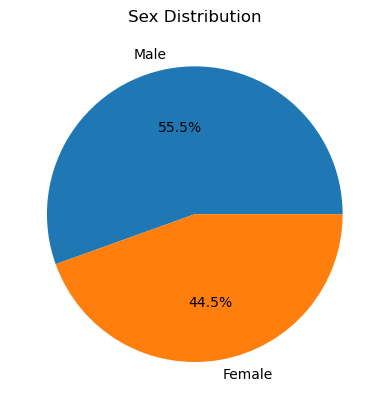

In [14]:
plt.pie(x=df['sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

Insights From Visualizations: From Sex distribution visualization Males are more compare to Females in our dataset

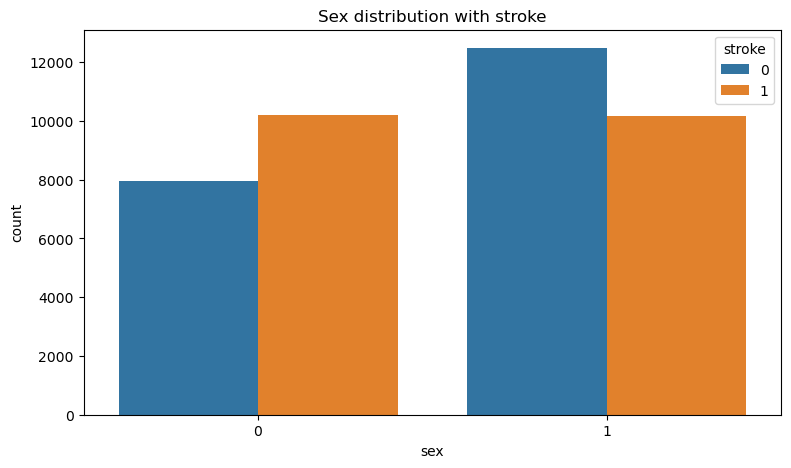

In [15]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='sex',hue='stroke')
plt.title('Sex distribution with stroke')
plt.show()

Insights From Visualizations: From Sex distribution with stroke visualization Females are getting more stroke compare to Males according to our dataset

## AGE 

In [16]:
print(f'The oldest persons age in our dataset is {df["age"].max()}')
print(f'The youngest persons age in our dataset is {df["age"].min()}')
print(f'The Average age of all person in our dataset is {round(df["age"].mean())}')

The oldest persons age in our dataset is 103
The youngest persons age in our dataset is 1
The Average age of all person in our dataset is 51


In [17]:
df['age'].value_counts()

age
53     668
49     660
60     657
50     657
56     655
      ... 
99      31
100     14
102      7
101      6
103      1
Name: count, Length: 103, dtype: int64

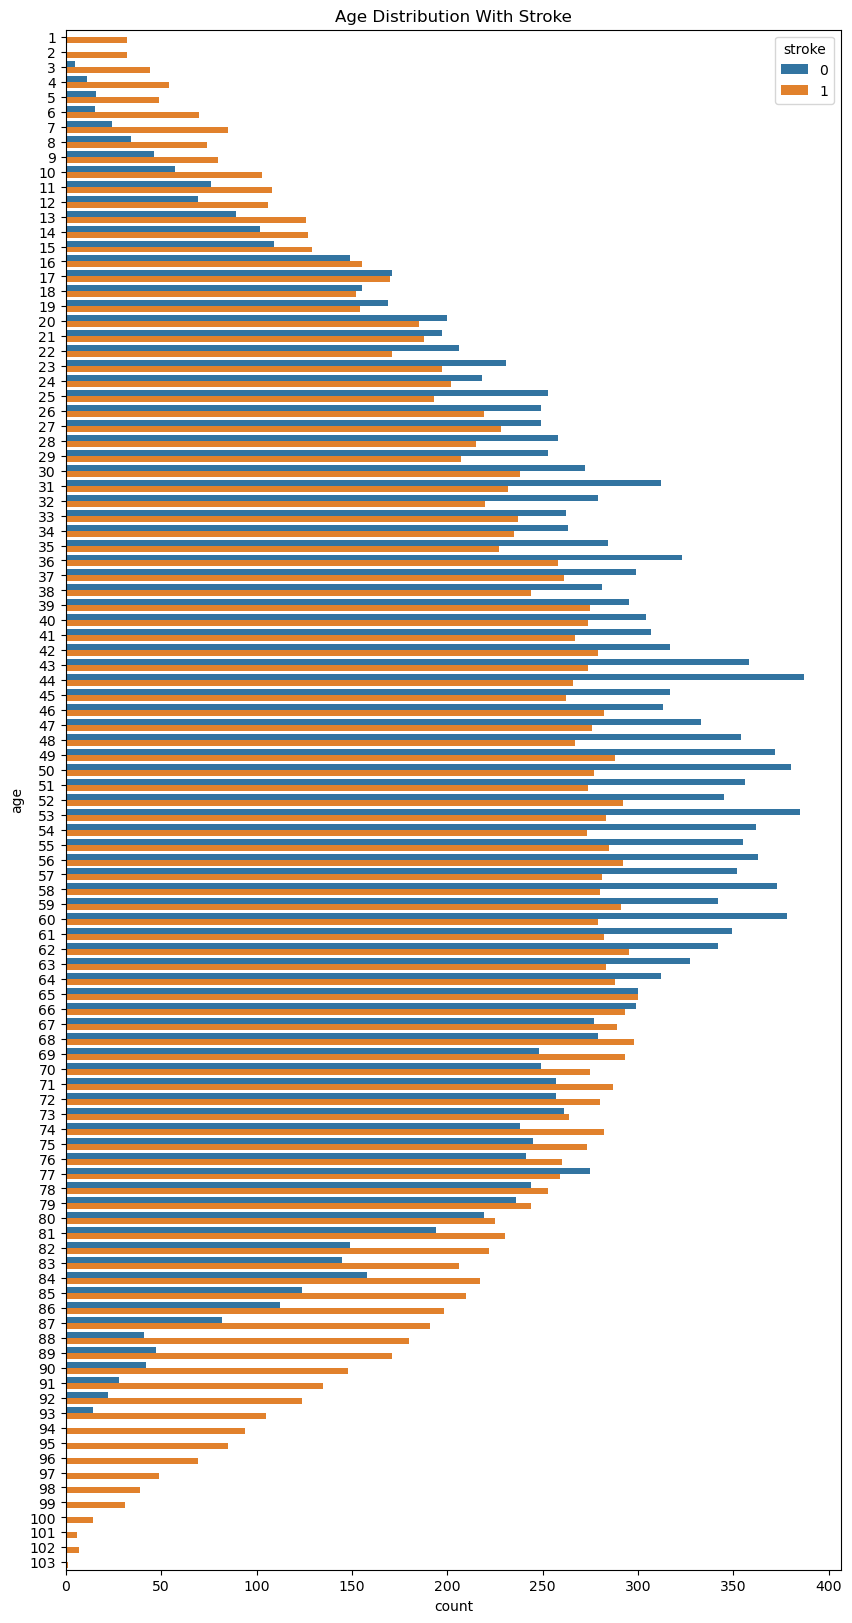

In [18]:
plt.figure(figsize=(10,20))
sns.countplot(data=df,y='age',hue='stroke')
plt.title('Age Distribution With Stroke')
plt.show()

Insights From Visualizations: From the above visual we can see more strokes are coming for person under age of 17 , and we can see the similar pattern for people above 65 years old and these persons are at higher risk of getting stroke.

## Hypertension

In the dataset and in Hypertension column 0 means the person is not having Hypertension , 1 means having Hypertension

In [19]:
df['hypertension'].value_counts()

hypertension
0    32107
1     8719
Name: count, dtype: int64

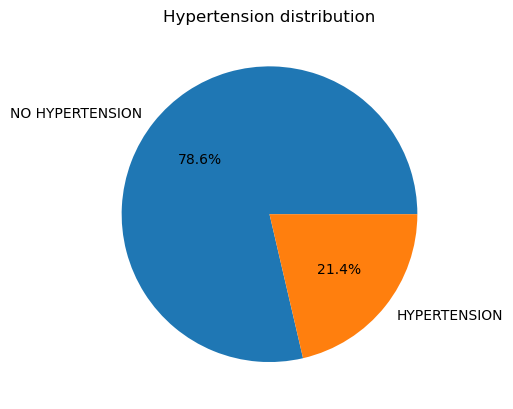

In [20]:
plt.pie(df['hypertension'].value_counts(),labels=('NO HYPERTENSION','HYPERTENSION'),autopct='%1.1f%%')
plt.title('Hypertension distribution')
plt.show()

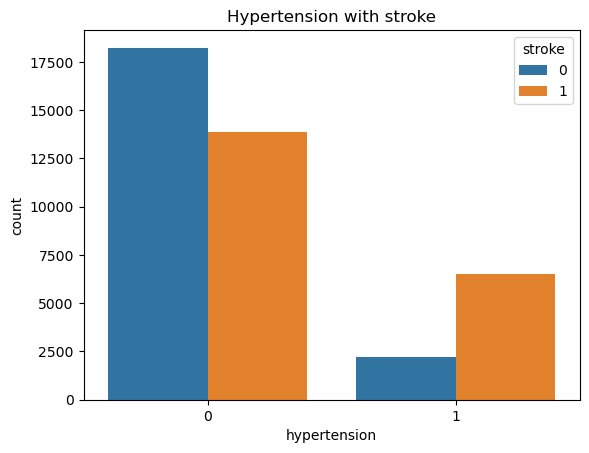

In [21]:
sns.countplot(data=df,x='hypertension',hue='stroke')
plt.title('Hypertension with stroke')
plt.show()

Insights visualizations: From the above visual the person who are having hypertension are at higher risk of getting stokes and who are not having hypertension they are having low risk of strokes

## Heart Disease

In the dataset in heart_disease column 0 means the person is not having heart_disease , 1 means having heart_disease

In [22]:
df['heart_disease'].value_counts()

heart_disease
0    35615
1     5211
Name: count, dtype: int64

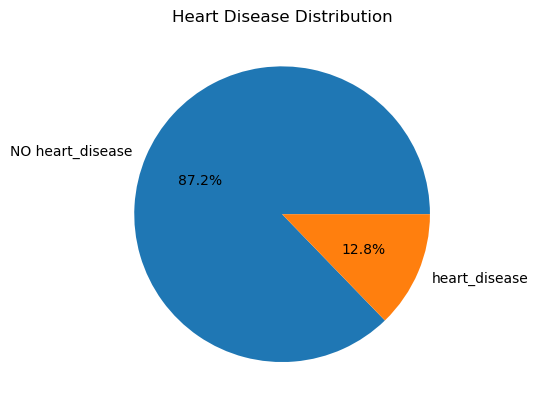

In [23]:
plt.pie(df['heart_disease'].value_counts(),labels=('NO heart_disease','heart_disease'),autopct='%1.1f%%')
plt.title('Heart Disease Distribution')
plt.show()

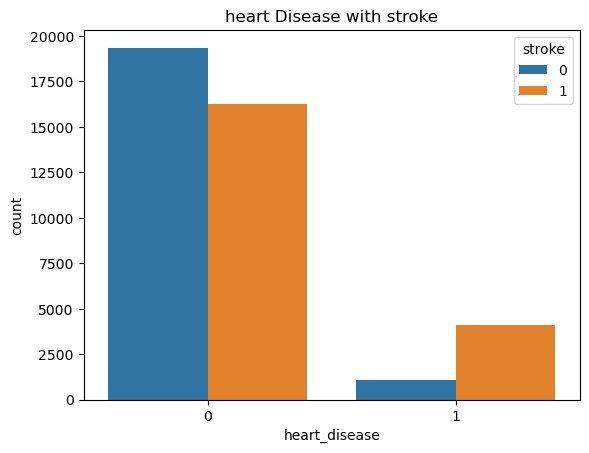

In [24]:
sns.countplot(data=df,x='heart_disease',hue='stroke')
plt.title('heart Disease with stroke')
plt.show()

Insights visualizations: From the above visual the person who are having heart_disease are at higher risk of getting stokes and who are not having heart_disease they are having low risk of strokes

## Ever Married

In the dataset in ever_married column 0 means the person is not married , 1 means married

In [25]:
df['ever_married'].value_counts()

ever_married
1    33529
0     7297
Name: count, dtype: int64

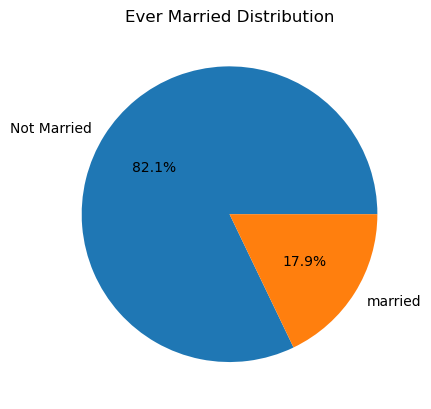

In [26]:
plt.pie(df['ever_married'].value_counts(),labels=('Not Married','married'),autopct='%1.1f%%')
plt.title('Ever Married Distribution')
plt.show()

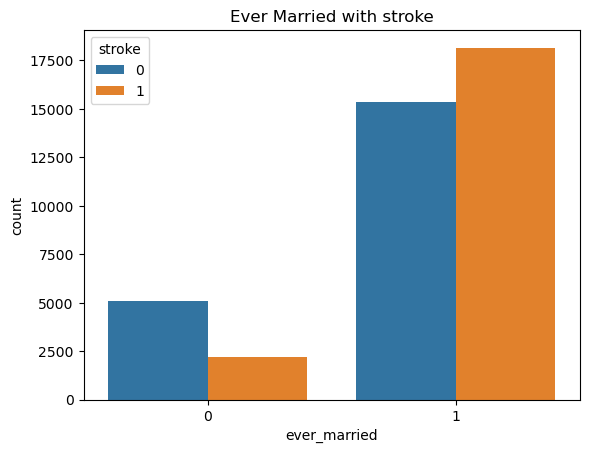

In [27]:
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.title('Ever Married with stroke')
plt.show()

Insights visualizations: From the above visual the person who are married are at higher risk of getting stokes and who are not get married they are having low risk of strokes

## Work Type

In the dataset in work_type column 0 means the person is never worked, 1 means children, 2 means government_job, 3 means self_employee 4 means private_job

In [28]:
df['work_type'].value_counts()

work_type
4    25513
3     9217
2     5580
1      431
0       85
Name: count, dtype: int64

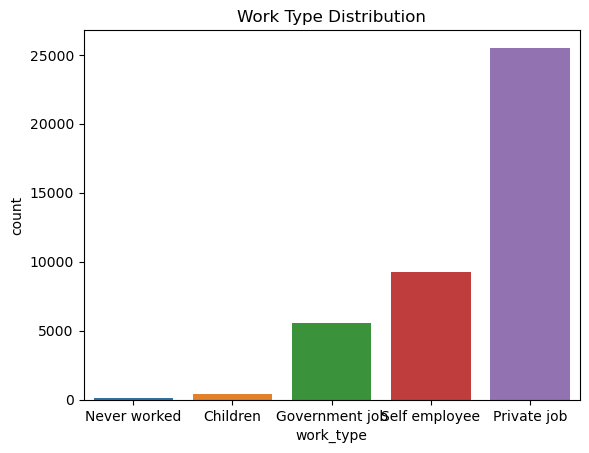

In [29]:
sns.countplot(data=df,x='work_type')
plt.xticks([0,1,2,3,4],labels=['Never worked','Children','Government job','Self employee','Private job'])
plt.title('Work Type Distribution')
plt.show()

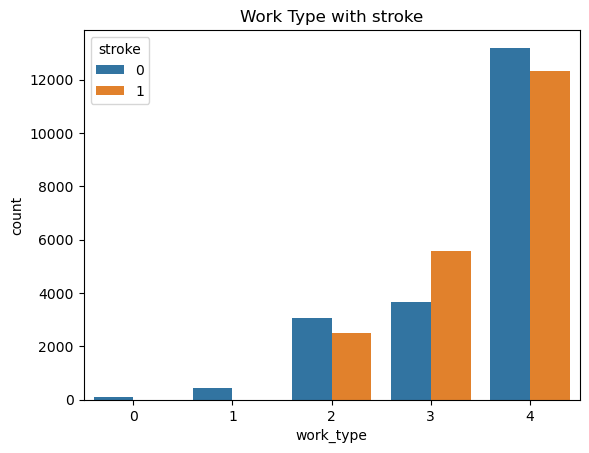

In [30]:
sns.countplot(data=df,x='work_type',hue='stroke') 
plt.title('Work Type with stroke')
plt.show()

Insights visualizations: From the above visual the person who are doing private jobs  are at higher risk of getting stokes and who are not doing any job and  children they are having low risk of strokes

## Residence_type

In the dataset in residence type column 0 means the person is living in rural area, 1 means the person is living in urban area .

In [31]:
df['Residence_type'].value_counts() 

Residence_type
1    21013
0    19813
Name: count, dtype: int64

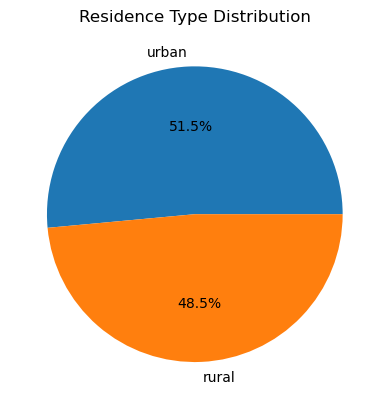

In [32]:
plt.pie(df['Residence_type'].value_counts(),labels=('urban','rural'),autopct='%1.1f%%')
plt.title('Residence Type Distribution')
plt.show()

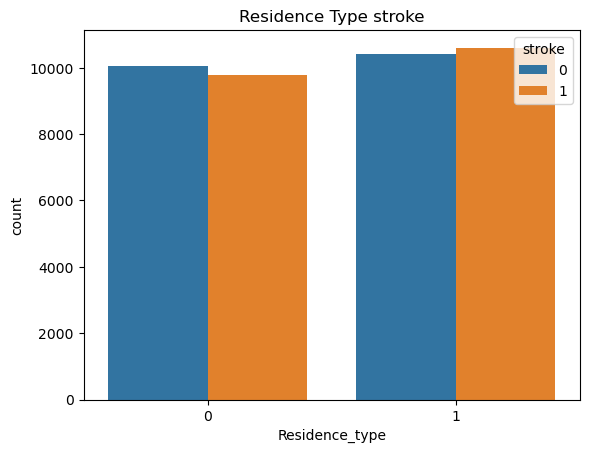

In [33]:
sns.countplot(data=df,x='Residence_type',hue='stroke')
plt.title('Residence Type stroke')
plt.show()

Insights visualizations: From the above visual the person who are living in urban area there is 50/50 chance of getting stokes and not getting strokes and similar to people living in rural area .

## Glucose Level

In [34]:
print(f'The Highest Glucose Level in dataset is {df["avg_glucose_level"].max()} mg/dL')
print(f'The Lowest Glucose Level in dataset is {df["avg_glucose_level"].min()} mg/dL')
print(f'The Average Glucose Level for the dataset is {round(df["avg_glucose_level"].mean())} mg/dL')

The Highest Glucose Level in dataset is 271.74 mg/dL
The Lowest Glucose Level in dataset is 55.12 mg/dL
The Average Glucose Level for the dataset is 122 mg/dL


In [35]:
print('According to World Health Organisation for normal fasting blood glucose concentration are between 70 mg/dL and 100 mg/dL. When fasting blood glucose is between 100 to 125 mg/dL')

According to World Health Organisation for normal fasting blood glucose concentration are between 70 mg/dL and 100 mg/dL. When fasting blood glucose is between 100 to 125 mg/dL


C:\Users\Aishwarya\anaconda3\ANAKONDA PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aishwarya\anaconda3\ANAKONDA PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


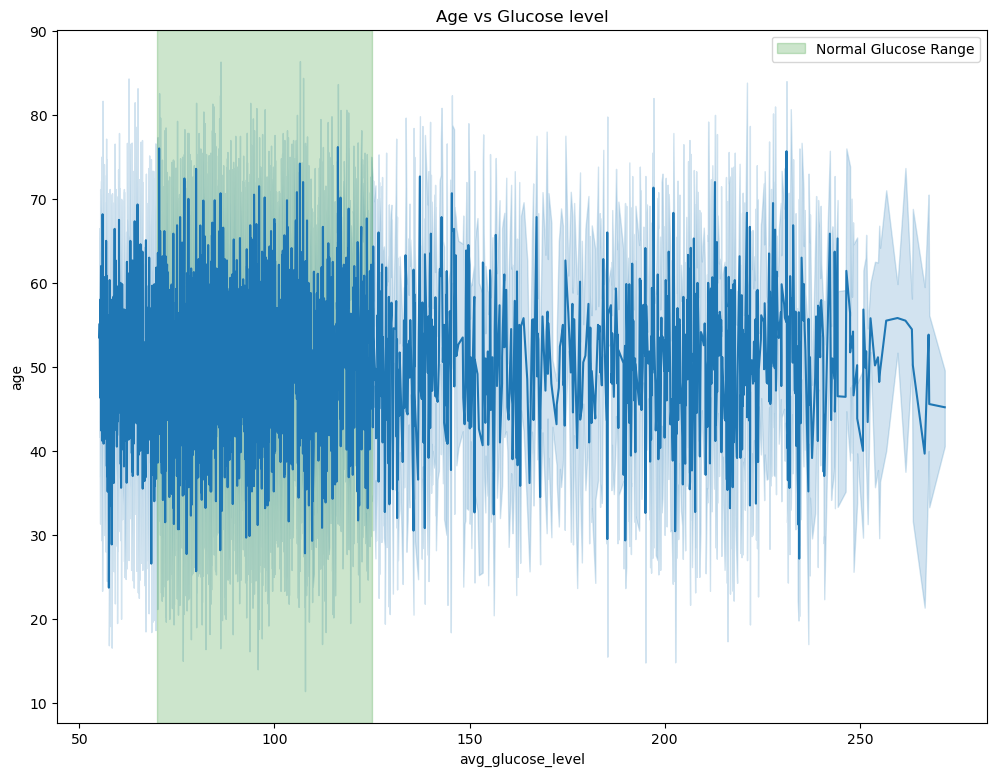

In [36]:
plt.figure(figsize=(12,9))
sns.lineplot(data=df,x='avg_glucose_level',y='age')
plt.title('Age vs Glucose level')
plt.axvspan(70,125,color='g',alpha=0.2,label='Normal Glucose Range')
plt.legend()
plt.show()

Insights visualizations: From the above visual the people with above normal glucose range is very high and they are in high chance of getting stokes in all age ranges

## BMI

In [37]:
print(f'The Highest BMI in dataset is {df["bmi"].max()}')
print(f'The Lowest BMI in dataset is {df["bmi"].min()}')
print(f'The Average BMI for the dataset is {round(df["bmi"].mean())}')

The Highest BMI in dataset is 92.0
The Lowest BMI in dataset is 11.5
The Average BMI for the dataset is 30


In [38]:
print('According to World Health Organisation for normal BMI range is from 19 to 25')

According to World Health Organisation for normal BMI range is from 19 to 25


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_30616\2300785799.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])
C:\Users\Aishwarya\anaconda3\ANAKONDA PYTHON\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


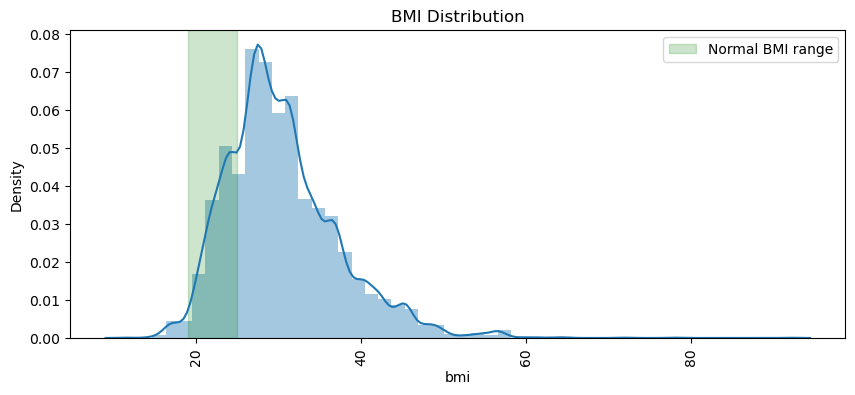

In [39]:
plt.figure(figsize=(10,4))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.axvspan(19,25,color='g',alpha=0.2,label='Normal BMI range')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Insight Visualization: From the above visual who are having over weight are very huge when comapre to normal people

## SMOKING STATUS

In [40]:
df['smoking_status'].value_counts()

smoking_status
0    20871
1    19955
Name: count, dtype: int64

In the dataset 0 means not smoking 1 means smoking 

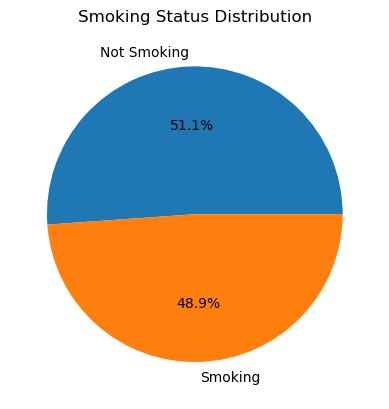

In [41]:
plt.pie(df['smoking_status'].value_counts(),labels=('Not Smoking','Smoking'),autopct='%1.1f%%')
plt.title('Smoking Status Distribution')
plt.show()

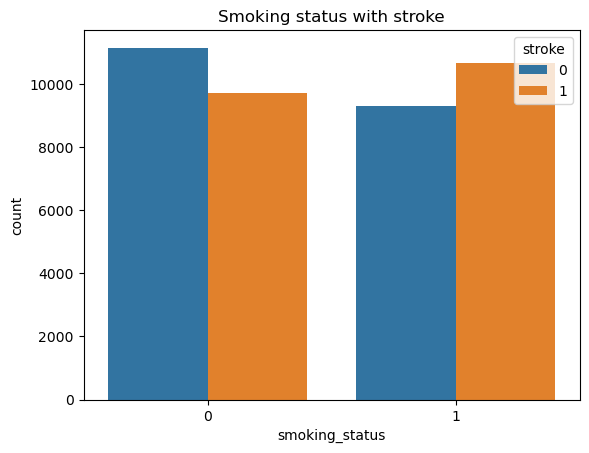

In [42]:
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.title('Smoking status with stroke')
plt.show()

Insight Visualization : The person who are smoking are having hig risk of getting stroke then comapre to  who are not smoking

In [43]:
df['stroke'].value_counts()

stroke
0    20447
1    20379
Name: count, dtype: int64

In the dataset 0 means not getting storkes and 1 means who are getting strokes

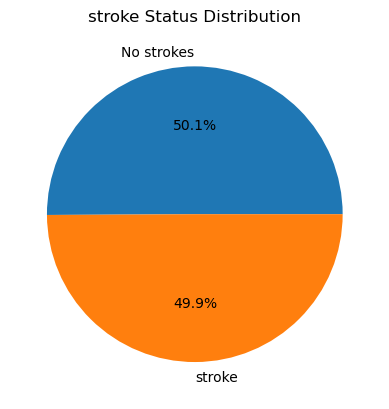

In [44]:
plt.pie(df['stroke'].value_counts(),labels=('No strokes','stroke'),autopct='%1.1f%%')
plt.title('stroke Status Distribution')
plt.show()

Insight Visualization: In this dataset 50% of people are getting strokes and remaining 50% are not getting

In [45]:
df.corr()['stroke']

sex                 -0.111795
age                  0.063873
hypertension         0.257093
heart_disease        0.224154
ever_married         0.181877
work_type            0.026320
Residence_type       0.011468
avg_glucose_level    0.265722
bmi                  0.018275
smoking_status       0.069005
stroke               1.000000
Name: stroke, dtype: float64

<Axes: >

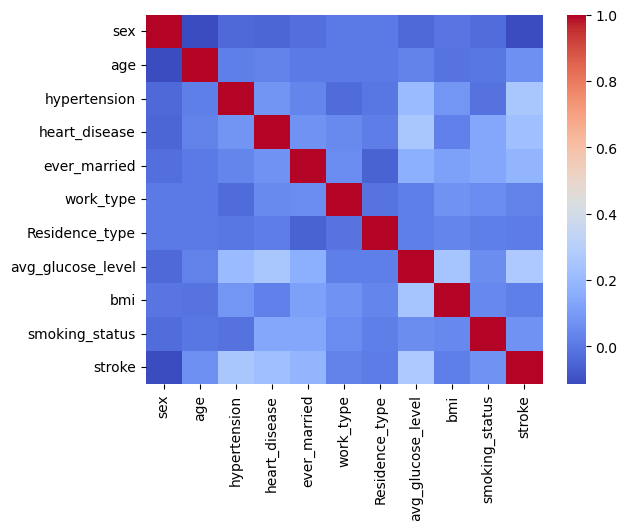

In [46]:
sns.heatmap(df.corr(),cmap='coolwarm')

## SPLITING THE DATA INTO TRANIING DATA AND TESTING DATA

In [47]:
x=df.drop('stroke',axis=1)

In [48]:
x

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,63,0,1,1,4,1,228.69,36.6,1
1,1,42,0,1,1,4,0,105.92,32.5,0
2,0,61,0,0,1,4,1,171.23,34.4,1
3,1,41,1,0,1,3,0,174.12,24.0,0
4,1,85,0,0,1,4,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
40905,1,38,0,0,0,4,1,120.94,29.7,1
40906,0,53,0,0,1,4,0,77.66,40.8,0
40907,1,32,0,0,1,2,0,231.95,33.2,0
40908,1,42,0,0,1,3,0,216.38,34.5,0


In [49]:
y=df['stroke']

In [50]:
y

0        1
1        1
2        1
3        1
4        1
        ..
40905    0
40906    0
40907    0
40908    0
40909    0
Name: stroke, Length: 40826, dtype: int64

In [51]:
x=np.array(x)
y=np.array(y)

In [52]:
x

array([[  1.  ,  63.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  1.  ,  42.  ,   0.  , ..., 105.92,  32.5 ,   0.  ],
       [  0.  ,  61.  ,   0.  , ..., 171.23,  34.4 ,   1.  ],
       ...,
       [  1.  ,  32.  ,   0.  , ..., 231.95,  33.2 ,   0.  ],
       [  1.  ,  42.  ,   0.  , ..., 216.38,  34.5 ,   0.  ],
       [  1.  ,  35.  ,   0.  , ...,  95.01,  28.  ,   0.  ]])

In [53]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=20)

## DATA MODELING

In [55]:
log_reg=LogisticRegression()

In [56]:
log_reg.fit(x_test,y_test)

C:\Users\Aishwarya\anaconda3\ANAKONDA PYTHON\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
log_ypred=log_reg.predict(x_test)

In [58]:
print(f'The accuracy for logistic regression is { accuracy_score(log_ypred,y_test)*100}')

The accuracy for logistic regression is 68.09943668870928


In [59]:
dec=DecisionTreeClassifier()

In [60]:
dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
dec_ypred=dec.predict(x_test)

In [62]:
print(f'The accuracy score for the decison tree is { accuracy_score(dec_ypred,y_test)*100}')

The accuracy score for the decison tree is 99.9755082047514


In [63]:
ran_clf=RandomForestClassifier()

In [64]:
ran_clf.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
ran_pred=ran_clf.predict(x_test)

In [66]:
print(f'The accuracy score for the random forest is {accuracy_score(y_test,ran_pred)*100}') 

The accuracy score for the random forest is 99.7060984570169


From the Three models decision tree is giving more accuracy so we are selecting decsion tree model for prediction

## Predicting for user data

In [67]:
df.columns

Index(['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [69]:
user_sex=int(input('Enter Your sex (1 for Male ,0 for Female):'))
user_age=int(input('Enter Your age in years :'))
user_hypertension=int(input('Enter Your hypertension category (0 for no hypertension , 1 for hypertension):'))
user_heartdisease=int(input('Enter Your heartdisease category (0 for no heart disease , 1 for heart disease):'))
user_married=int(input('Enter Your marriage status category (0 for  not married , 1 for married):'))
user_worktype=int(input('Enter Your work type category (0 for  notworking, 1 for children ,2 for government job, 3 for self employeed,4 for private job:'))
user_residence=int(input('Enter Your residence category (0 for  rural , 1 for urban):'))
user_glucose=int(input('Enter Your glucose level in mg /dL'))
user_bmi=int(input('Enter Your bmi level'))
user_smoking=int(input('Enter Your smoking status category (0 for  not smoking , 1 for smoking):'))

Enter Your sex (1 for Male ,0 for Female):0
Enter Your age in years :23
Enter Your hypertension category (0 for no hypertension , 1 for hypertension):0
Enter Your heartdisease category (0 for no heart disease , 1 for heart disease):0
Enter Your marriage status category (0 for  not married , 1 for married):0
Enter Your work type category (0 for  notworking, 1 for children ,2 for government job, 3 for self employeed,4 for private job:0
Enter Your residence category (0 for  rural , 1 for urban):1
Enter Your glucose level in mg /dL23
Enter Your bmi level22
Enter Your smoking status category (0 for  not smoking , 1 for smoking):0


In [70]:
user_data=[user_sex,user_age,user_hypertension,user_heartdisease,user_married,user_worktype,user_residence,user_glucose,user_bmi,user_smoking]

In [71]:
result=dec.predict([user_data])[0]
if result==0:
    print('You will not get stroke')
else:
    print('you will get stroke')

You will not get stroke
